# Data

Download here:
https://raw.githubusercontent.com/SamHames/MLD/master/data.npz

# Pip in a virtual environment
    
    #Setup a virtual environment
    /path/to/python3 -m venv ml_tutorial
    source ml_tutorial/bin/activate

    # Upgrade pip to newest version
    python -m pip install --upgrade pip

    # Install the dependencies
    python -m pip install numpy scipy scikit-learn

# Conda

    # After installing conda or miniconda
    conda create -n ml_tutorial python=3.5 scikit-learn
    source activate ml_tutorial

    # Activate the Conda environment on Windows:
    activate ml_tutorial


# Demonstration environment
    pip install jupyter matplotlib

    # Inside a Conda environment (these are already installed in the base distribution)
    conda install jupyter matplotlib

# Testing Your Installation

If the following works you are ready for this workshop.

    import numpy as np
    import sklearn

    dataset = np.load('path/to/data.npz')
    images = dataset['images']
    labels = dataset['labels']

In [ ]:
# Import the libraries


# Load the dataset

[[[ 25  35  39 ...  53  53  37]
  [ 34  45  46 ...  90  78  55]
  [ 43  52  51 ... 129 114  66]
  ...
  [ 43  52  21 ... 237 182 135]
  [ 42  49  34 ... 164 106  63]
  [ 47  47  33 ... 125  72  39]]

 [[ 51  44  44 ...  40  43  40]
  [ 50  48  59 ...  53  61  57]
  [ 53  61  75 ...  57  56  50]
  ...
  [ 25  25  50 ... 248 241 191]
  [ 32  31  49 ... 244 227 157]
  [ 46  45  43 ... 194 150  96]]

 [[ 24  30  32 ...  58  66  41]
  [ 18  29  36 ...  52  22  25]
  [ 17  29  39 ...  81  19  22]
  ...
  [ 37  49  70 ...  54  45  30]
  [ 32  47  66 ...  37  33  25]
  [ 24  31  38 ...  29  19  16]]

 ...

 [[ 56  61  82 ... 107  90  67]
  [ 51  67  82 ... 198 156 104]
  [ 78 102 103 ... 233 221 180]
  ...
  [ 62  72  84 ... 232 208 145]
  [ 62  81  70 ... 175 148 100]
  [ 51  93  77 ... 104 107  88]]

 [[ 74  66  66 ...  72  56  56]
  [ 90  88  82 ...  80  56  42]
  [ 85 100  97 ...  96  87  71]
  ...
  [ 86  85  82 ... 148  82  70]
  [ 47  70  74 ... 121  84  65]
  [ 57  68  65 ... 101  87  

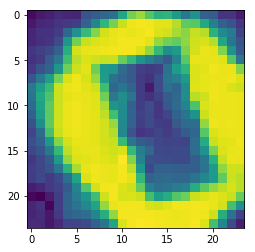

In [5]:
import numpy as np

# Optional for plotting
import matplotlib.pyplot as plt

# Optional for notebook display
%matplotlib inline

data = np.load('data.npz')
images = data['images']
labels = data['labels']

print(images)
print(labels)
plt.imshow(images[0])


In [ ]:
# Image Properties

In [6]:
# Image Properties

# Get the first image:
first_image = images[0] # Or equivalently: images[0, :, :]
print(first_image.shape)

# Get first three images:
several_images = images[:3]
print(several_images.shape)

(24, 24)
(3, 24, 24)


# Our Data

![](images/example_images.png)

In [ ]:
# Slicing and dicing

In [ ]:
# Slicing and dicing
cropped_image = first_image[4:20,4:20]
print(cropped_image.shape)

In [ ]:
# Getting our data in the right format

(730, 576)


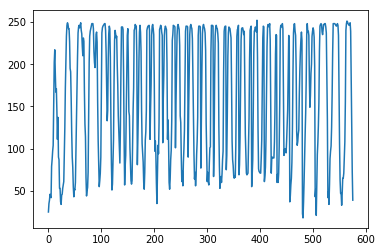

In [9]:
# Getting our data in the right format

X = np.reshape(images, (730, -1))
print(X.shape)

plt.plot(X[0])

In [ ]:
# Modifying arrays

In [ ]:
# Modifying arrays

increase_brightness = first_image + 30
decrease_brightness = first_image - 30
increase_contrast = first_image * 1.5
decrease_contrast = first_image * 0.5

brightness_compare = np.hstack((increase_brightness, decrease_brightness))
constrast_compare = np.hstack((increase_contrast, decrease_contrast))

plt.figure(figsize = (15, 12))
plt.title('Brightness')
plt.axis('off')
plt.imshow(brightness_compare, cmap='gray') 

plt.figure(figsize = (15, 12))
plt.title('Contrast')
plt.axis('off')
plt.imshow(constrast_compare, cmap='gray')

# Questions/Exercises

1. Why do we have to be careful with the datatype for numerical operations?

Tag Number             |  Pattern   | Details
:-------------------------:|:-------------------------: | :-------------------------:
0  |  Rectangle | 100 bees that were the control group
1  |  Circle    | 100 bees that were treated with caffeine
2  | Blank      | Single queen in the colony received this tag

In [ ]:
# The labels to go with the images


In [10]:
# The labels to go with the images

labels = data['labels']

print(labels.shape)
print(labels[::100])

y = labels

(730,)
[0 0 0 0 1 1 1 2]


In [ ]:
# Split of a testing set

In [11]:
# Split of a testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=4
)
print(
    X_train.shape, y_train.shape, 
    X_test.shape, y_test.shape
)

(584, 576) (584,) (146, 576) (146,)


In [ ]:
# Visualise the data

(584, 2)


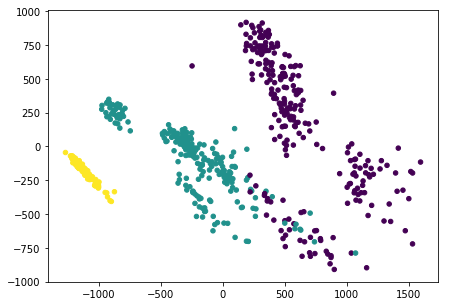

In [16]:
# Visualise the data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
fit_trans_X = pca.fit(X_train).transform(X_train)
print(fit_trans_X.shape)
plt.figure(figsize = (7, 5))
plt.scatter(
    fit_trans_X[:, 0], fit_trans_X[:, 1], c=y_train, s=20
)

In [ ]:
# A better transformation

In [ ]:
# A better transformation

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
lda_model = lda.fit(X_train, y_train)
X_trans = lda_model.transform(X_train)
plt.figure(figsize = (7, 5))
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y_train, s=20)

![](images/svm.png)

In [ ]:
# Now lets make some predictions


In [19]:
# Now lets make some predictions
from sklearn import svm

clf = svm.SVC(gamma=0.0001, C=10)
clf.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
# How well did we do?


In [23]:
# How well did we do?
# transform_testing_set = pca.transform(X_test)
y_pred = clf.predict(X_test)
print(y_pred)

from sklearn import metrics

print (metrics.accuracy_score(y_test, y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.4178082191780822


# Exercises

1. Replace the SVM classifier with any other classifier from the scikit-learn library.
2. Compare the classification performance both with and without LDA.
3. What happens if we evaluate our performance on the training set?

In [ ]:
# Let's build a pipeline

In [30]:
# Let's build a pipeline
from sklearn.pipeline import Pipeline

# Start by creating the individual steps in the pipeline
pca = PCA(n_components=50)
svc = svm.SVC(gamma=0.0001, C=1e6)

pipeline = Pipeline([('pca', pca),
                     ('svc', svc)])

pipeline.fit(X_train, y_train)

pipeline.score(X_test, y_test)

0.5821917808219178

In [ ]:
# Put it all together

In [39]:
# Finding good parameters

from sklearn.model_selection import RandomizedSearchCV

search_range = {'pca__n_components': [2, 3, 5, 10, 15, 20, 30, 50],
                'svc__C': [1, 10, 100, 1000, 10e3, 10e4]}

searcher = RandomizedSearchCV(pipeline, search_range, n_iter=20)

searcher.fit(X_train, y_train)
print(searcher.score(X_train, y_train))
print(searcher.score(X_test, y_test))
print(searcher.best_params_)

0.9931506849315068
0.9794520547945206
{'svc__C': 10, 'pca__n_components': 2}


In [ ]:
# Testing it out

In [ ]:
# Testing it out
print(searcher.best_score_)
print(searcher.best_params_)
searcher.score(images, labels)

# Questions/Exercises

1. Why is searcher.score(images, labels) not an accurate measure of performance? How do we fix it?
2. Try out some other classifiers in the pipeline - can you improve the final performance on the test set? What about with other search parameters?
3. Is accuracy really the best measure of performance for this dataset?

In [ ]:
# Solution to one:

image_train, image_test, label_train, label_test = train_test_split(images, 
                                                                    labels, 
                                                                    test_size=0.2)
searcher.fit(image_train, label_train)
searcher.score(image_test, label_test)